In [8]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from fixed_support import fixed_support

In [50]:
from sklearn.datasets import load_digits
digits = load_digits()

# Percentage of data for training
p_training = .7

k_training = int(p_training*len(digits.target))


In [53]:
target_train = digits.target[0:30]#k_training]
images_train = digits.images[0:30]#k_training]

target_test = digits.target[k_training:]
images_test = digits.images[k_training:]

(array([53., 53., 53., 53., 57., 56., 54., 54., 52., 55.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

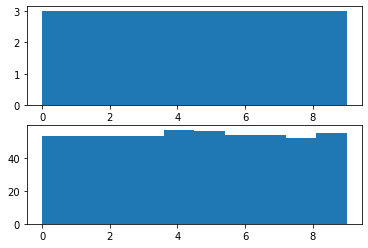

In [54]:
fig, ax = plt.subplots(2)

ax[0].hist(target_train, bins = 10)
ax[1].hist(target_test, bins = 10)

## Training

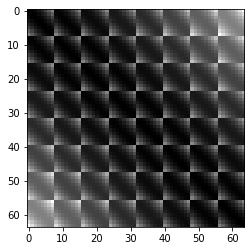

In [55]:
N = len(np.array(digits.images[0].flatten()))

# Define support for xi
N_euc = int(np.sqrt(N))

# Create cost matrix (l-2 norm used for the moment)
c = np.zeros((N, N))
for i, mi in enumerate(list(product(np.arange(N_euc), np.arange(N_euc)))):
    for j, mj in enumerate(list(product(np.arange(N_euc), np.arange(N_euc)))):
        c[i, j] = np.linalg.norm(np.array(mi)- np.array(mj), 2)**2 # l-2 norm

# Plot
plt.imshow(c)

In [56]:
typical_p = []
# select cifre to analyze
for digit in range(10):
    # Save p_k
    p_k = [np.array(images_train[k].flatten())/sum(np.array(images_train[k].flatten())) 
           for k in np.where(target_train == digit)[0][0:]]

    r, p = fixed_support(c, p_k)
    typical_p.append(p)
    


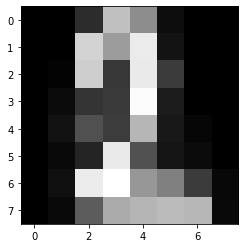

In [60]:
p = typical_p[2]
p_opt = [p[i*N_euc:N_euc*(i + 1)] for i in range(N_euc)]
plt.gray()
plt.imshow(p_opt)

## Testing

In [84]:
import cvxpy as cp

def wasserstein_dist(c, p, p_k):
    N = len(p_k)

    # Dec Var
    T = cp.Variable((N, N))

    # Obj
    #obj = cp.Minimize(cp.trace(c.T@T))
    obj = cp.Minimize(sum(sum(cp.multiply(T, c))))

    # Cons
    cons = [T >= 0]
    cons.append(T@np.ones(N) == p)
    cons.append(T.T@np.ones(N) == p_k)

    # Solve program
    problem = cp.Problem(obj, cons)
    problem.solve(verbose= True)

    return obj.value

In [93]:
#from fixed_support import wasserstein_dist
k =18

p_k = np.array(images_test[k].flatten())/sum(np.array(images_test[k].flatten()))

In [95]:
a = wasserstein_dist(c, typical_p[9], p_k)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 04:12:21 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 04:12:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 04:12:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 04:12:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 04:12:21 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 04:12:21 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

In [87]:
digit_result = []
for image in images_test:
    p_k = np.array(image.flatten())/sum(np.array(image.flatten()))
    classifier = [wasserstein_dist(c, typical_p[k], p_k) for k in range(10)]
    digit_result.append(np.argmin(classifier))

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:28:26 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:28:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:28:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:28:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:28:26 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:28:26 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

(CVXPY) Dec 14 02:28:33 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:28:33 PM: Finished problem compilation (took 1.725e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:28:33 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:28:33 PM: Problem status: optimal
(CVXPY) Dec 14 02:28:33 PM: Optimal value: 1.873e+00
(CVXPY) Dec 14 02:28:33 PM: Compilation took 1.725e+00 seconds
(CVXPY) Dec 14 02:28:33 PM: Solver (including time spent in interface) took 2.047e-02 seconds
                                     CVXPY         

(CVXPY) Dec 14 02:28:39 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:28:39 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:28:39 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:28:39 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:28:39 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:28:39 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:28:39 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:28:39 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:28:40 PM: Applying reduction ECOS
(CVXPY) De

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:28:46 PM: Problem status: optimal
(CVXPY) Dec 14 02:28:46 PM: Optimal value: 4.500e-01
(CVXPY) Dec 14 02:28:46 PM: Compilation took 1.483e+00 seconds
(CVXPY) Dec 14 02:28:46 PM: Solver (including time spent in interface) took 2.734e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:28:46 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:28:46 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:28:46 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:28:46 PM: C

(CVXPY) Dec 14 02:28:52 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:28:52 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:28:52 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:28:52 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:28:53 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:28:53 PM: Finished problem compilation (took 1.713e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:28:53 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:28:53 PM:

(CVXPY) Dec 14 02:28:59 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:28:59 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:28:59 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:28:59 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:28:59 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:28:59 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:28:59 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:28:59 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:29:01 PM: Applying reduction ECOS
(CVXPY) De

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:29:06 PM: Problem status: optimal
(CVXPY) Dec 14 02:29:06 PM: Optimal value: 2.799e+00
(CVXPY) Dec 14 02:29:06 PM: Compilation took 1.632e+00 seconds
(CVXPY) Dec 14 02:29:06 PM: Solver (including time spent in interface) took 2.810e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:29:06 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:29:06 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:29:06 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:29:06 PM: C

(CVXPY) Dec 14 02:29:12 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:29:12 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:29:12 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:29:12 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:29:14 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:29:14 PM: Finished problem compilation (took 1.782e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:29:14 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:29:14 PM:

(CVXPY) Dec 14 02:29:20 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:29:20 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:29:20 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:29:20 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:29:20 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:29:20 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:29:20 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:29:20 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:29:20 PM: Applyi

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:29:27 PM: Problem status: optimal
(CVXPY) Dec 14 02:29:27 PM: Optimal value: 1.395e+00
(CVXPY) Dec 14 02:29:27 PM: Compilation took 1.523e+00 seconds
(CVXPY) Dec 14 02:29:27 PM: Solver (including time spent in interface) took 3.575e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:29:27 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:29:27 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:29:27 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:29:27 PM: C

(CVXPY) Dec 14 02:29:33 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:29:33 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:29:33 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:29:33 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:29:35 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:29:35 PM: Finished problem compilation (took 1.895e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:29:35 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:29:35 PM:

(CVXPY) Dec 14 02:29:41 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:29:41 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:29:41 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:29:41 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:29:41 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:29:41 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:29:41 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:29:41 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:29:42 PM: Applying reduction ECOS
(CVXPY) De

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:29:50 PM: Problem status: optimal
(CVXPY) Dec 14 02:29:50 PM: Optimal value: 1.646e+00
(CVXPY) Dec 14 02:29:50 PM: Compilation took 2.569e+00 seconds
(CVXPY) Dec 14 02:29:50 PM: Solver (including time spent in interface) took 3.917e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:29:50 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:29:50 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:29:50 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:29:50 PM: C

(CVXPY) Dec 14 02:29:58 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:29:58 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:29:58 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:29:58 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:30:00 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:30:00 PM: Finished problem compilation (took 2.422e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:30:00 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:30:00 PM:

(CVXPY) Dec 14 02:30:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:30:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:30:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:30:08 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:30:08 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:30:08 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:30:08 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:30:08 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:30:10 PM: Applying reduction ECOS
(CVXPY) De

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:30:18 PM: Problem status: optimal
(CVXPY) Dec 14 02:30:18 PM: Optimal value: 1.409e+00
(CVXPY) Dec 14 02:30:18 PM: Compilation took 2.234e+00 seconds
(CVXPY) Dec 14 02:30:18 PM: Solver (including time spent in interface) took 3.562e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:30:18 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:30:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:30:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:30:18 PM: C

(CVXPY) Dec 14 02:30:26 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:30:26 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:30:26 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:30:26 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:30:27 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:30:28 PM: Finished problem compilation (took 1.793e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:30:28 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:30:28 PM:

(CVXPY) Dec 14 02:30:33 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:30:33 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:30:33 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:30:33 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:30:34 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:30:34 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:30:34 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:30:34 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:30:34 PM: Applyi

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:30:41 PM: Problem status: optimal
(CVXPY) Dec 14 02:30:41 PM: Optimal value: 1.787e+00
(CVXPY) Dec 14 02:30:41 PM: Compilation took 1.613e+00 seconds
(CVXPY) Dec 14 02:30:41 PM: Solver (including time spent in interface) took 2.678e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:30:41 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:30:41 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:30:41 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:30:41 PM: C

(CVXPY) Dec 14 02:30:46 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:30:46 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:30:47 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:30:47 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:30:48 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:30:48 PM: Finished problem compilation (took 1.818e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:30:48 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:30:48 PM:

(CVXPY) Dec 14 02:30:54 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:30:54 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:30:54 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:30:54 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:30:54 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:30:54 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:30:54 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:30:54 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:30:56 PM: Applying reduction ECOS
(CVXPY) De

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:31:01 PM: Problem status: optimal
(CVXPY) Dec 14 02:31:01 PM: Optimal value: 3.068e+00
(CVXPY) Dec 14 02:31:01 PM: Compilation took 1.620e+00 seconds
(CVXPY) Dec 14 02:31:01 PM: Solver (including time spent in interface) took 3.231e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:31:02 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:31:02 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:31:02 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:31:02 PM: C

(CVXPY) Dec 14 02:31:08 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:31:08 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:31:08 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:31:08 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:31:09 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:31:09 PM: Finished problem compilation (took 1.793e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:31:09 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:31:09 PM:

(CVXPY) Dec 14 02:31:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:31:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:31:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:31:15 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:31:15 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:31:15 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:31:15 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:31:15 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:31:17 PM: Applying reduction ECOS
(CVXPY) De

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:31:22 PM: Problem status: optimal
(CVXPY) Dec 14 02:31:22 PM: Optimal value: 1.028e+00
(CVXPY) Dec 14 02:31:22 PM: Compilation took 1.576e+00 seconds
(CVXPY) Dec 14 02:31:22 PM: Solver (including time spent in interface) took 4.594e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:31:23 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:31:23 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:31:23 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:31:23 PM: C

(CVXPY) Dec 14 02:31:28 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:31:28 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:31:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:31:28 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:31:30 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:31:30 PM: Finished problem compilation (took 2.028e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:31:30 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:31:30 PM:

(CVXPY) Dec 14 02:31:36 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:31:36 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:31:36 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:31:36 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:31:36 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:31:36 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:31:36 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:31:36 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:31:36 PM: Applyi

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:31:43 PM: Problem status: optimal
(CVXPY) Dec 14 02:31:43 PM: Optimal value: 1.215e+00
(CVXPY) Dec 14 02:31:43 PM: Compilation took 1.596e+00 seconds
(CVXPY) Dec 14 02:31:43 PM: Solver (including time spent in interface) took 2.207e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:31:43 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:31:43 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:31:43 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:31:43 PM: C

(CVXPY) Dec 14 02:31:50 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:31:50 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:31:50 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:31:50 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:31:52 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:31:52 PM: Finished problem compilation (took 2.548e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:31:52 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:31:53 PM:

(CVXPY) Dec 14 02:32:01 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:32:01 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:32:01 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:32:01 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:32:01 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:32:01 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:32:01 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:32:01 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:32:03 PM: Applying reduction ECOS
(CVXPY) De

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:32:11 PM: Problem status: optimal
(CVXPY) Dec 14 02:32:11 PM: Optimal value: 1.388e+00
(CVXPY) Dec 14 02:32:11 PM: Compilation took 2.162e+00 seconds
(CVXPY) Dec 14 02:32:11 PM: Solver (including time spent in interface) took 2.789e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:32:12 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:32:12 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:32:12 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:32:12 PM: C

(CVXPY) Dec 14 02:32:19 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:32:19 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:32:19 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:32:19 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:32:21 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:32:21 PM: Finished problem compilation (took 2.286e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:32:21 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:32:21 PM:

(CVXPY) Dec 14 02:32:27 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:32:27 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:32:27 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:32:27 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:32:28 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:32:28 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:32:28 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:32:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:32:28 PM: Applyi

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:32:34 PM: Problem status: optimal
(CVXPY) Dec 14 02:32:34 PM: Optimal value: 1.201e+00
(CVXPY) Dec 14 02:32:34 PM: Compilation took 1.599e+00 seconds
(CVXPY) Dec 14 02:32:34 PM: Solver (including time spent in interface) took 3.344e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:32:35 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:32:35 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:32:35 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:32:35 PM: C

(CVXPY) Dec 14 02:32:40 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:32:40 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:32:40 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:32:40 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:32:42 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:32:42 PM: Finished problem compilation (took 1.642e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:32:42 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:32:42 PM:

(CVXPY) Dec 14 02:32:47 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:32:47 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:32:47 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:32:47 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:32:47 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:32:47 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:32:48 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:32:48 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:32:49 PM: Applying reduction ECOS
(CVXPY) De

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:32:55 PM: Problem status: optimal
(CVXPY) Dec 14 02:32:55 PM: Optimal value: 1.717e+00
(CVXPY) Dec 14 02:32:55 PM: Compilation took 1.510e+00 seconds
(CVXPY) Dec 14 02:32:55 PM: Solver (including time spent in interface) took 2.912e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:32:55 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:32:55 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:32:55 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:32:55 PM: C

(CVXPY) Dec 14 02:33:00 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:33:00 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:33:00 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:33:00 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:33:02 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:33:02 PM: Finished problem compilation (took 1.697e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:33:02 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:33:02 PM:

(CVXPY) Dec 14 02:33:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:33:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:33:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:33:07 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:33:07 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:33:07 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:33:07 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:33:07 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:33:09 PM: Applying reduction ECOS
(CVXPY) De

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:33:14 PM: Problem status: optimal
(CVXPY) Dec 14 02:33:14 PM: Optimal value: 9.693e-01
(CVXPY) Dec 14 02:33:14 PM: Compilation took 1.534e+00 seconds
(CVXPY) Dec 14 02:33:14 PM: Solver (including time spent in interface) took 2.405e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:33:14 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:33:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:33:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:33:14 PM: C

(CVXPY) Dec 14 02:33:20 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:33:20 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:33:20 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:33:20 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:33:21 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:33:21 PM: Finished problem compilation (took 1.763e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:33:21 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:33:22 PM:

(CVXPY) Dec 14 02:33:27 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:33:27 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:33:27 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:33:27 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:33:27 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:33:27 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:33:27 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:33:27 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:33:29 PM: Applying reduction ECOS
(CVXPY) De

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:33:34 PM: Problem status: optimal
(CVXPY) Dec 14 02:33:34 PM: Optimal value: 1.493e+00
(CVXPY) Dec 14 02:33:34 PM: Compilation took 1.694e+00 seconds
(CVXPY) Dec 14 02:33:34 PM: Solver (including time spent in interface) took 2.676e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:33:34 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:33:34 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:33:34 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:33:34 PM: C

(CVXPY) Dec 14 02:33:42 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:33:42 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:33:42 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:33:42 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:33:44 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:33:44 PM: Finished problem compilation (took 2.626e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:33:44 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:33:44 PM:

(CVXPY) Dec 14 02:33:51 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:33:51 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:33:51 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:33:51 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:33:52 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:33:52 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:33:52 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:33:52 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:33:52 PM: Applyi

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:33:59 PM: Problem status: optimal
(CVXPY) Dec 14 02:33:59 PM: Optimal value: 1.957e+00
(CVXPY) Dec 14 02:33:59 PM: Compilation took 1.555e+00 seconds
(CVXPY) Dec 14 02:33:59 PM: Solver (including time spent in interface) took 2.731e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:33:59 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:33:59 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:33:59 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:33:59 PM: C

(CVXPY) Dec 14 02:34:04 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:34:04 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:34:04 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:34:04 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:34:06 PM: Applying reduction ECOS
(CVXPY) Dec 14 02:34:06 PM: Finished problem compilation (took 2.095e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:34:06 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:34:06 PM:

(CVXPY) Dec 14 02:34:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:34:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:34:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:34:14 PM: Compiling problem (target solver=ECOS).
(CVXPY) Dec 14 02:34:14 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Dec 14 02:34:14 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 14 02:34:14 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 14 02:34:14 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Dec 14 02:34:16 PM: Applying reduction ECOS
(CVXPY) De

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Dec 14 02:34:24 PM: Problem status: optimal
(CVXPY) Dec 14 02:34:24 PM: Optimal value: 9.923e-01
(CVXPY) Dec 14 02:34:24 PM: Compilation took 2.366e+00 seconds
(CVXPY) Dec 14 02:34:24 PM: Solver (including time spent in interface) took 2.850e-02 seconds
                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Dec 14 02:34:25 PM: Your problem has 4096 variables, 3 constraints, and 0 parameters.
(CVXPY) Dec 14 02:34:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 14 02:34:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 14 02:34:25 PM: C

SolverError: Solver 'ECOS' failed. Try another solver, or solve with verbose=True for more information.

In [88]:
a = len(digit_result)

In [89]:
1 - len(np.nonzero(target_test[0:a] - digit_result)[0])/len(digit_result)

0.8235294117647058

In [90]:
a

17